## Neural Net using 🐍🔥 Pytorch

### Downloading Our Dependencies
***
1. Scipy
1. Pytorch
1. Numpy
1. Matplotlib

In [ ]:
# !pip install scipy
!pip3 install torch torchvision torchaudio #COLAB ALREADY HAS ALL OF THESE BY DEFAULT
# !pip install numpy

### Importing Our Dependencies ✅
***

In [ ]:
import torch
from torch import nn
from torch.optim import *
import numpy as np
import matplotlib.pyplot as plt


### Device Selector For Pytorch
***
Will delegate computational tasks to CUDA compatible GPU if available

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")
torch.cuda.empty_cache()
print(f"Emptied the CUDA CACHE")

Using cpu device
Emptied the CUDA CACHE


### Code I "Borrowed" 😉 From Prof. Pedro's Notebook For Creation Of Lecture
***
returns us our X_learn Matrix (Inputs) and the Y_learn Matrix (Expected Outputs)

In [ ]:
def concept(x, typ):
    if typ==0:
        return 4*x-4*x**2
    elif typ==1:
        return x**2
    else:
        return x*(3*x-2)**2
def concept_lec(typ,m):
    X_c=np.random.rand(m,1).astype(np.double)
    Y_c=concept(X_c, typ).astype(np.double)
    return X_c,Y_c
Assignment=1
Resolution=10
X_learn, Y_learn=concept_lec(Assignment,Resolution)
print(f"x:{X_learn} y:{Y_learn}")

x:[[0.1920723 ]
 [0.72566962]
 [0.7849367 ]
 [0.97209836]
 [0.85097142]
 [0.54359433]
 [0.08979087]
 [0.48887324]
 [0.92793635]
 [0.7876182 ]] y:[[0.03689177]
 [0.5265964 ]
 [0.61612563]
 [0.94497523]
 [0.72415235]
 [0.29549479]
 [0.0080624 ]
 [0.23899705]
 [0.86106587]
 [0.62034243]]


### Converting The Inputs To A Tensor
***
Using datatype Float32 for better precision than regular float and faster compute times compared float 64

In [ ]:
X = torch.tensor(X_learn,dtype=torch.float32).to(device)
Y = torch.tensor(Y_learn,dtype=torch.float32).to(device)

NameError: name 'X_learn' is not defined

### Defining Our Student Class 🧑‍🎓
***
Each student class follows the form:
- Two sets of weights
 - A user defined number of neurons
    * Default is 2
 - A user choice from a few implemented optimization functions
    * Default is Adam
 - A user choice from a few implemented loss functions
    * Default is MSE


<details>
    <summary> View All Optimizer Functions</summary>
    ### Currently Implemented Optimizer Functions
      * Adam
      * SGD
      * Adagrad
      * LBFGS
</details>
<details>
    <summary> View All Loss Functions</summary>
    ### Currently Implemented Loss Functions
      * MSE
      * Gaussian
      * MAE
</details>



In [ ]:
class Student(nn.Module):
    def __init__(self,neurons: int=2,optimizer="Adam",lossfunc="MSE"):
        super().__init__()
        self.layers=nn.Sequential(
            nn.Linear(1,neurons),nn.Sigmoid(),nn.Linear(neurons,1)
        )
        if optimizer=="Adam":
            self.optimizer= Adam(self.parameters())
        elif optimizer=="SGD":
            self.optimizer= SGD(self.parameters())
        elif optimizer=="Adagrad":
            self.optimizer= Adagrad(self.parameters())
        elif optimizer=="Adamax":
            self.optimizer= Adamax(self.parameters())
        else:
            print(f"💀 Error! Unknown Optimizer '{optimizer}'")
            raise NameError
        if lossfunc=="MSE":
            self.loss= nn.MSELoss()
        elif lossfunc=="Gaussian":
            self.loss= nn.GaussianNLLLoss()
        elif lossfunc=="MAE":  ##MAE is mean absolute error
            self.loss= nn.L1Loss()
        else:
            print("💀 Error! Unknown Loss Functions '{lossfunc}'")
            raise NameError
    def fit(self,x,Y):
        self.optimizer.zero_grad() ##Resets the sum of gradients to zero, normally pytorch accumulates gradients during backward propogation and this is useful if we wish to train RNNs however, in our case it may have the unintended effect of pushing us away from our desired max or min, I encourage you to comment out the zero_grad and see what happens
        y_pred=self.forward(x)
        loss = self.loss(Y,y_pred)
        loss.backward()
        self.optimizer.step()
        return loss.item()
    def forward(self,x):
        return self.layers(x)



### Here we define an instance of the student class called `student1`
***
- Student1 has 3 Neurons
- Student 1 uses the Mean Squared Error function for calculating loss
- Student 1 uses the Adam Optimizer

In [ ]:
student1=Student(3,"Adam","MSE").to(device) ##To Device is to automatically send the model to the GPU

### Defining an instance `student2` with altered parameters
***

In [ ]:
student2=Student(4,"SGD","MSE").to(device)

### Defining Our Trainer Function
***
Simply pass in an instance of student class that you wish to train and optionally increase or decrease the number of epochs for training, by default it is set to 10000
It returns a list that is of the form `[[Epochs],[Loss at Epochs]]`

In [ ]:
def trainer(Student,EPOCHS=10000):
    EPOCH_ARR=[]
    LOSS_ARR=[]
    for i in range(EPOCHS):
        loss = Student.fit(X,Y)
        EPOCH_ARR.append(i)
        LOSS_ARR.append(loss)
    return [EPOCH_ARR,LOSS_ARR]

### Finally Training And Graphing Our Loss
***
1. Call the trainer function
2. Create a figure using matplotlib
3. Create A subplot
4. Add all the points
5. Minor Cosmetic stuff like arrows and titles
6. Displaying graph!

In [ ]:
fig= plt.figure()

output1=trainer(student1)
xpoints = output1[0]
ypoints = output1[1]
ax1=fig.add_subplot(221)
ax1.plot(xpoints, ypoints)
ax1.ticklabel_format(style='plain')
ax1.title.set_text("ADAM + MSE ")
ax1.set_xlabel("Epochs ➡️")
ax1.set_ylabel("Loss ➡️")
ax1.set_ylim([0,0.5])

output2=trainer(student2)
xpoints = output2[0]
ypoints = output2[1]
ax1=fig.add_subplot(222)
ax1.plot(xpoints, ypoints)
ax1.ticklabel_format(style='plain')
ax1.title.set_text("SGD + MSE ")
ax1.set_xlabel("Epochs ➡️")
ax1.set_ylabel("Loss ➡️")
ax1.set_ylim([0,0.5])
fig.tight_layout(pad=5.0)
plt.show()

NameError: name 'student1' is not defined

<Figure size 640x480 with 0 Axes>

### How To Run An Inference
***
pass your dataset into the class like: `student1(Tensor_input)`

if you want to learn how to convert an array to a tensor scroll back up

In [ ]:
print(f"Predicted:{student1(X)}\n Expected:{Y}")

Predicted:tensor([[ 0.6521],
        [ 0.4416],
        [ 0.2562],
        [ 0.0075],
        [ 0.0786],
        [ 0.3420],
        [-0.0061],
        [ 0.4858],
        [ 0.5450],
        [ 0.1751]], grad_fn=<AddmmBackward0>)
 Expected:tensor([[6.5171e-01],
        [4.4218e-01],
        [2.5917e-01],
        [5.4981e-03],
        [7.0543e-02],
        [3.4493e-01],
        [3.7447e-04],
        [4.8524e-01],
        [5.4341e-01],
        [1.7481e-01]])


Sierra experimenting with Sankritya's class

Goals:
*   Implement iterations for training
*   Test multiple combinations at once and create standard graph to visualize this
*   Have seed for random numbers
*   fix Adagrad & FBSG
*   testing with different neurons
*   testing with different polynomials
*   transfer learning idea











In [ ]:
def polynomial(x, typ):                            # can completely randomly generate a polynomial by generating random # of terms, power, coefficient
    if typ==0:
        return 4*x-4*x**2
    elif typ==1:
        return x**2
    else:
        return x*(3*x-2)**2

def concept_lec(typ,m):
    X_c=np.random.rand(m,1).astype(np.double)
    Y_c=concept(X_c, typ).astype(np.double)
    return X_c,Y_c

def trainer(Student,X,Y,EPOCHS=10000):              # altering training function so can pass in custom polynomials easier
    EPOCH_ARR=[]
    LOSS_ARR=[]
    for i in range(EPOCHS):
        loss = Student.fit(X,Y)
        EPOCH_ARR.append(i)
        LOSS_ARR.append(loss)
    return [EPOCH_ARR,LOSS_ARR]


In [ ]:
def loss_graph(train_output, out_num,label,graph_index):        # graphing function that just takes output of graph & label as a parameter
  fig= plt.figure()
  xpoints = train_output[0]
  ax1=fig.add_subplot(graph_index)
  for i in range(out_num):
    ax1.plot(xpoints, train_output[i])
  # ax1.ticklabel_format(style='plain')
  ax1.title.set_text(label)
  ax1.set_xlabel("Epochs ➡️")
  ax1.set_ylabel("Loss ➡️")
  # ax1.set_ylim([0,0.5])
  # fig.tight_layout(pad=5.0)

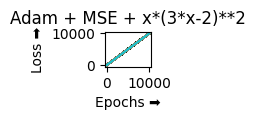

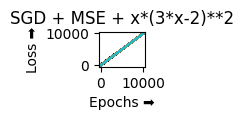

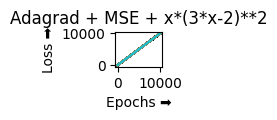

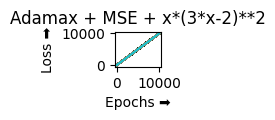

In [ ]:
np.random.seed(3)
optimizers = ["Adam","SGD","Adagrad","Adamax"]
loss_funcs = ["MSE", "Gaussian", "MAE"]
count = 0
concept_num = 3
out_list = []
for i in range(len(optimizers)):
  for j in range(concept_num): # num of concepts
    student=Student(3,optimizers[i],loss_funcs[0]).to(device)
    polynomials = ["4*x-4*x**2","x**2","x*(3*x-2)**2"]
    Assignment=1
    Resolution=100
    X_learn, Y_learn=concept_lec(Assignment,Resolution)
    X = torch.tensor(X_learn,dtype=torch.float32).to(device)
    Y = torch.tensor(Y_learn,dtype=torch.float32).to(device)
    out = trainer(student,X,Y)
    out_list.append(out)
  loss_graph(out_list,concept_num,optimizers[i]+" + "+loss_funcs[0]+" + "+polynomials[j],991+count)
  count+=1




plt.show()